# 此版本为选择200个训练样本的版本

In [18]:
import pathlib,random
import scipy.io as sio
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import os
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt 

In [2]:
BATCHSZ = 32
EPOCHS = 100

In [3]:
data_dir= "E:\Eric_HSI\hyper_data_preprocess\Salinas_w_size_1_num_200_for_2D"
data_root = glob.glob(data_dir + '/*')
print(data_root)

['E:\\Eric_HSI\\hyper_data_preprocess\\Salinas_w_size_1_num_200_for_2D\\data.npy', 'E:\\Eric_HSI\\hyper_data_preprocess\\Salinas_w_size_1_num_200_for_2D\\data_label.npy', 'E:\\Eric_HSI\\hyper_data_preprocess\\Salinas_w_size_1_num_200_for_2D\\test.npy', 'E:\\Eric_HSI\\hyper_data_preprocess\\Salinas_w_size_1_num_200_for_2D\\test_label.npy', 'E:\\Eric_HSI\\hyper_data_preprocess\\Salinas_w_size_1_num_200_for_2D\\train.npy', 'E:\\Eric_HSI\\hyper_data_preprocess\\Salinas_w_size_1_num_200_for_2D\\train_label.npy']


In [4]:
for name in glob.glob(data_dir + '/*'):
    print(name)

E:\Eric_HSI\hyper_data_preprocess\Salinas_w_size_1_num_200_for_2D\data.npy
E:\Eric_HSI\hyper_data_preprocess\Salinas_w_size_1_num_200_for_2D\data_label.npy
E:\Eric_HSI\hyper_data_preprocess\Salinas_w_size_1_num_200_for_2D\test.npy
E:\Eric_HSI\hyper_data_preprocess\Salinas_w_size_1_num_200_for_2D\test_label.npy
E:\Eric_HSI\hyper_data_preprocess\Salinas_w_size_1_num_200_for_2D\train.npy
E:\Eric_HSI\hyper_data_preprocess\Salinas_w_size_1_num_200_for_2D\train_label.npy


In [5]:
train = np.load(data_root[4])
train_label = np.load(data_root[5])
test = np.load(data_root[2])
test_label = np.load(data_root[3])
train.shape, train_label.shape, test.shape, test_label.shape

((3200, 1, 1, 204), (3200,), (50929, 1, 1, 204), (50929,))

In [7]:
class_num = np.max(test_label)

In [8]:
train = np.expand_dims(train, 4)
test = np.expand_dims(test, 4)

In [9]:
train.shape, train_label.shape, test.shape, test_label.shape

((3200, 1, 1, 204, 1), (3200,), (50929, 1, 1, 204, 1), (50929,))

In [10]:
# 创建dataset
db_train = tf.data.Dataset.from_tensor_slices((train, train_label))
db_test = tf.data.Dataset.from_tensor_slices((test, test_label))

db_train = db_train.shuffle(3800).batch(batch_size=BATCHSZ).repeat()
db_test = db_test.batch(batch_size=BATCHSZ)

In [11]:
db_train, db_test

(<RepeatDataset shapes: ((None, 1, 1, 204, 1), (None,)), types: (tf.float32, tf.int32)>,
 <BatchDataset shapes: ((None, 1, 1, 204, 1), (None,)), types: (tf.float32, tf.int32)>)

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv3D(input_shape=train[1].shape, filters=32, kernel_size=(1, 1, 8), strides=(1, 1, 3), padding='valid', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv3D(filters=64, kernel_size=(1, 1, 8), strides=(1, 1, 3), padding='valid', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv3D(filters=128, kernel_size=(1, 1, 8), strides=(1, 1, 3), padding='valid', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(class_num+1, activation='softmax'),
])

In [13]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, min_lr=0.000001, verbose=1)

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.001),  # 优化器的选择
             loss='sparse_categorical_crossentropy',
              metrics=['acc']
             )

In [15]:
history = model.fit(db_train,
                    batch_size=BATCHSZ, 
                    steps_per_epoch=train.shape[0]//BATCHSZ,
                    epochs=EPOCHS, 
                    validation_data=db_test,
                    validation_steps=test.shape[0]//BATCHSZ,
                    callbacks=[reduce_lr]
                    )

Epoch 1/100
100/100 [==============================] - 2s 20ms/step - loss: 1.8688 - acc: 0.3647 - val_loss: 3.4542 - val_acc: 0.1179
Epoch 2/100
100/100 [==============================] - 2s 18ms/step - loss: 1.2165 - acc: 0.5241 - val_loss: 5.3062 - val_acc: 0.0339
Epoch 3/100
100/100 [==============================] - 2s 19ms/step - loss: 0.9937 - acc: 0.6116 - val_loss: 7.6733 - val_acc: 0.0339
Epoch 4/100
100/100 [==============================] - 2s 19ms/step - loss: 0.9544 - acc: 0.6272 - val_loss: 9.9179 - val_acc: 0.0339
Epoch 5/100
100/100 [==============================] - 2s 18ms/step - loss: 0.8201 - acc: 0.6800 - val_loss: 7.5133 - val_acc: 0.0343
Epoch 6/100
100/100 [==============================] - 2s 18ms/step - loss: 0.7879 - acc: 0.6778 - val_loss: 4.5332 - val_acc: 0.2334
Epoch 7/100
100/100 [==============================] - 2s 18ms/step - loss: 0.7042 - acc: 0.7169 - val_loss: 1.1096 - val_acc: 0.5470
Epoch 8/100
100/100 [==============================] - 2s 18ms

In [16]:
# save the model with h5py
if not os.path.exists('model'):
    os.mkdir('model')
model.save('./model/HSI_model5.h5')

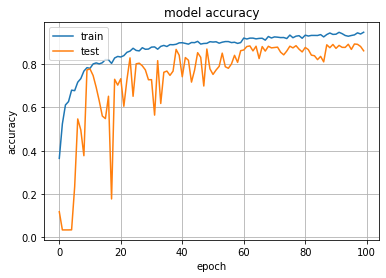

In [19]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid(True)
plt.legend(['train', 'test'], loc='upper left') 
# plt.savefig("./result/model_accuracy_100.svg")
plt.show()

In [124]:
acc_num,test_num = 0,0
matrix = np.zeros((class_num,class_num),dtype=np.int32)

target_names = ['Alfalfa', 'Corn-notill', 'Corn-mintill', 'Corn'
           ,'Grass-pasture', 'Grass-trees', 'Grass-pasture-mowed', 
            'Hay-windrowed', 'Oats', 'Soybean-notill', 'Soybean-mintill',
           'Soybean-clean', 'Wheat', 'Woods', 'Buildings-Grass-Trees-Drives',
           'Stone-Steel-Towers']

def reports(test,test_label):
    Y_pred_label = model.predict(test)
    # 概率最大的值的位置就为预测的类别
    y_pred_label = np.argmax(Y_pred_label, axis=1)

    # 分类报告：precision    recall  f1-score   support
    classification = classification_report(test_label, y_pred_label, target_names=target_names)
    # 混淆矩阵
    matrix = confusion_matrix(test_label, y_pred_label)
    # 模型得分
    score = model.evaluate(test, test_label, batch_size=32)
    test_Loss = score[0]*100
    overall_accuracy = score[1]*100
    
    return classification, matrix, test_loss, overall_accuracy

In [127]:
# calculate result, loss, accuray and confusion matrix
classification, matrix, test_loss, overall_accuracy = reports(test,test_label)

1592/1592 [==============================] - 2s 1ms/step - loss: 0.3811 - acc: 0.8621


In [132]:
def save_result(classification, matrix, test_loss):
    classification = str(classification)
    matrix_str = str(matrix)

    # 类别精度
    accuracy_list = []
    for i in range(len(matrix)):
        ac = matrix[i, i] / sum(matrix[:, i])
        accuracy_list.append(ac)

    total_right = np.sum(np.trace(matrix))

    # kappa
    kk = 0
    for i in range(matrix.shape[0]):
        kk += np.sum(matrix[i]) * np.sum(matrix[:, i])
    pe = kk / (np.sum(matrix) * np.sum(matrix))
    pa = np.trace(matrix) / np.sum(matrix)
    kappa = (pa - pe) / (1 - pe)

    # OA and AA
    accuracy_list = np.asarray(accuracy_list)
    aa = np.mean(accuracy_list)
    oa = np.sum(np.trace(matrix)) / np.sum(matrix)

    if not os.path.exists('result'):
        os.mkdir('result')
    file_name = "./result/report.txt"
    with open(file_name, 'w') as x_file:
        for i in range(len(matrix)):
            accuracy_list = []
            ac = matrix[i, i] / sum(matrix[:, i])
            accuracy_list.append(ac)
            x_file.write('{} class: matrix[{}, {}] / sum(matrix[:, {}] {}'.format(i+1, i+1, i+1, i+1, ac))
            x_file.write('\n')
        x_file.write('\n')
        x_file.write(" classification result: \n")
        x_file.write('{}'.format(classification))
        x_file.write('\n')
        x_file.write(" confusion matrix: \n")
        x_file.write('{}'.format(matrix_str))

        x_file.write('\n')
        x_file.write('oa {}'.format(oa))
        x_file.write('\n')
        x_file.write('aa {}'.format(aa))
        x_file.write('\n')
        x_file.write('kappa {}'.format(kappa))
        x_file.write('\n')
        x_file.write('Test loss {} (%)'.format(test_loss))
        x_file.write('\n')

In [133]:
save_result(classification, matrix, test_loss)

# 绘图
# 对比一下三种获取方式得到的最终速度 - 选择第三种

In [24]:
data = np.load(data_root[0])
data_label = np.load(data_root[1])
data_gt_dict = sio.loadmat(r"E:\Eric_HSI\hyperspectral_datasets\Salinas_gt.mat")
data_gt_name = [t for t in list(data_gt_dict.keys()) if not t.startswith('__')][0]
data_gt = data_gt_dict[data_gt_name].astype(np.int32)

In [25]:
height = data_gt.shape[0]
width = data_gt.shape[1]
outputs = np.zeros((height,width))

In [26]:
import time

In [27]:
# calculate the predicted image， 非常慢
starttime = time.time()

k = 0
for i in tqdm(range(height)):
    for j in range(width): 
        # target = labels[i][j]
        if data_gt[i][j] == 0:
            k += 1
            continue
        else:
            prediction = np.argmax(model.predict(data[k].reshape(1, 1, 1, 204, 1)),  axis=-1)
            k += 1
            outputs[i][j] = prediction+1
            # print(prediction)

endtime = time.time()
dtime = endtime - starttime
print("程序运行时间：%.8s s" % dtime)  #显示到微秒

100%|██████████| 512/512 [26:45<00:00,  3.14s/it]程序运行时间：1605.590 s



In [28]:
import spectral

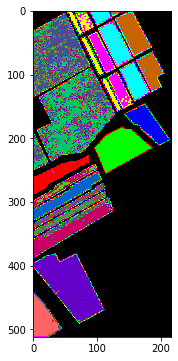

In [29]:
predict_image = spectral.imshow(classes=outputs.astype(np.int32), figsize=(6, 6))

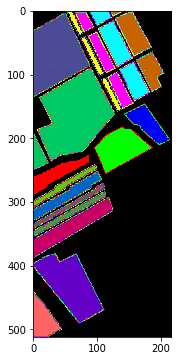

In [30]:
ground_truth = spectral.imshow(classes=data_gt, figsize=(6, 6))

In [62]:
record = list()
record

[]

In [64]:
starttime = time.time()

k = 0
for i in tqdm(range(height)):
    for j in range(width): 
        # target = labels[i][j]
        if data_gt[i][j] == 0:
            k += 1
            record.append(data_gt[i][j])
        else:
            prediction = np.argmax(model.predict(data[k].reshape(1, 1, 1, 204, 1)),  axis=-1)
            k += 1
            record.append(list(prediction+1))
            # print(prediction)

endtime = time.time()
dtime = endtime - starttime
print("程序运行时间：%.8s s" % dtime)  #显示到微秒

100%|██████████| 512/512 [26:35<00:00,  3.12s/it]程序运行时间：1595.268 s



In [95]:
# outputs = np.zeros((height,width))

def plot_image(data, data_gt, output_background=False):
    height = data_gt.shape[0]
    width = data_gt.shape[1]
    outputs = np.zeros((height,width))

    data = np.expand_dims(data, 4)
    prediction = np.argmax(model.predict(data),  axis=-1)
    outputs = (prediction+1).reshape(height,width)
    if output_background:
        pass
    else:
        for i in tqdm(range(height)):
            for j in range(width): 
                if data_gt[i][j] == 0:
                    outputs[i][j] = 0
    predict_image = spectral.imshow(classes=outputs.astype(np.int32), figsize=(6, 6))

100%|██████████| 512/512 [00:00<00:00, 10267.28it/s]


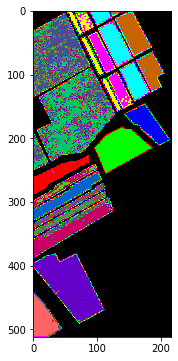

In [96]:
plot_image(data, data_gt, output_background=False)